<a href="https://colab.research.google.com/github/NikhilGeorge01/ML-Prac/blob/main/FeatureSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df_churn = pd.read_csv("customer_churn_dataset.csv")
df_sensor = pd.read_csv("sensor_maintenance_dataset.csv")
df_fraud = pd.read_csv("financial_fraud_dataset.csv")

In [21]:
df_churn.shape

(10000, 52)

In [19]:
df_sensor.shape

(12000, 57)

In [22]:
df_fraud.shape

(15000, 69)

**Constant , quasi constant and mutual information feature extraction for customer churn dataset**

In [23]:
x_train,x_test,y_train,y_test=train_test_split(df_churn.drop('churn',axis=1),df_churn['churn'],test_size=0.2,random_state=42)

In [24]:
constant_features = [feature for feature in x_train.columns if x_train[feature].std() == 0]

In [25]:
print(len(constant_features))

2


In [26]:
x_train.drop(labels=constant_features, axis=1, inplace=True)
x_test.drop(labels=constant_features, axis=1, inplace=True)

x_train.shape, x_test.shape

((8000, 49), (2000, 49))

In [ ]:
df_churn = pd.read_csv("customer_churn_dataset.csv")

In [34]:
x_train,x_test,y_train,y_test=train_test_split(df_churn.drop('churn',axis=1),df_churn['churn'],test_size=0.2,random_state=42)

In [35]:
quasi_const_feat = []
for feature in x_train.columns:
    predominant = (x_train[feature].value_counts() / float(len(x_train))).sort_values(ascending=False).values[0]
    if predominant >= 0.999:
        quasi_const_feat.append(feature)

print(len(quasi_const_feat))

2


In [36]:
x_train.drop(labels=quasi_const_feat, axis=1, inplace=True)
x_test.drop(labels=quasi_const_feat, axis=1, inplace=True)

x_train.shape, x_test.shape

((8000, 49), (2000, 49))

In [37]:
df_churn = pd.read_csv("customer_churn_dataset.csv")

In [38]:
x_train, x_test, y_train, y_test = train_test_split(df_churn.drop('churn', axis=1), df_churn['churn'], test_size=0.2, random_state=42)

In [40]:
from sklearn.feature_selection import mutual_info_classif

In [41]:
mi = pd.Series(mutual_info_classif(x_train, y_train), index=x_train.columns)
mi = mi.sort_values(ascending=False)

<Axes: >

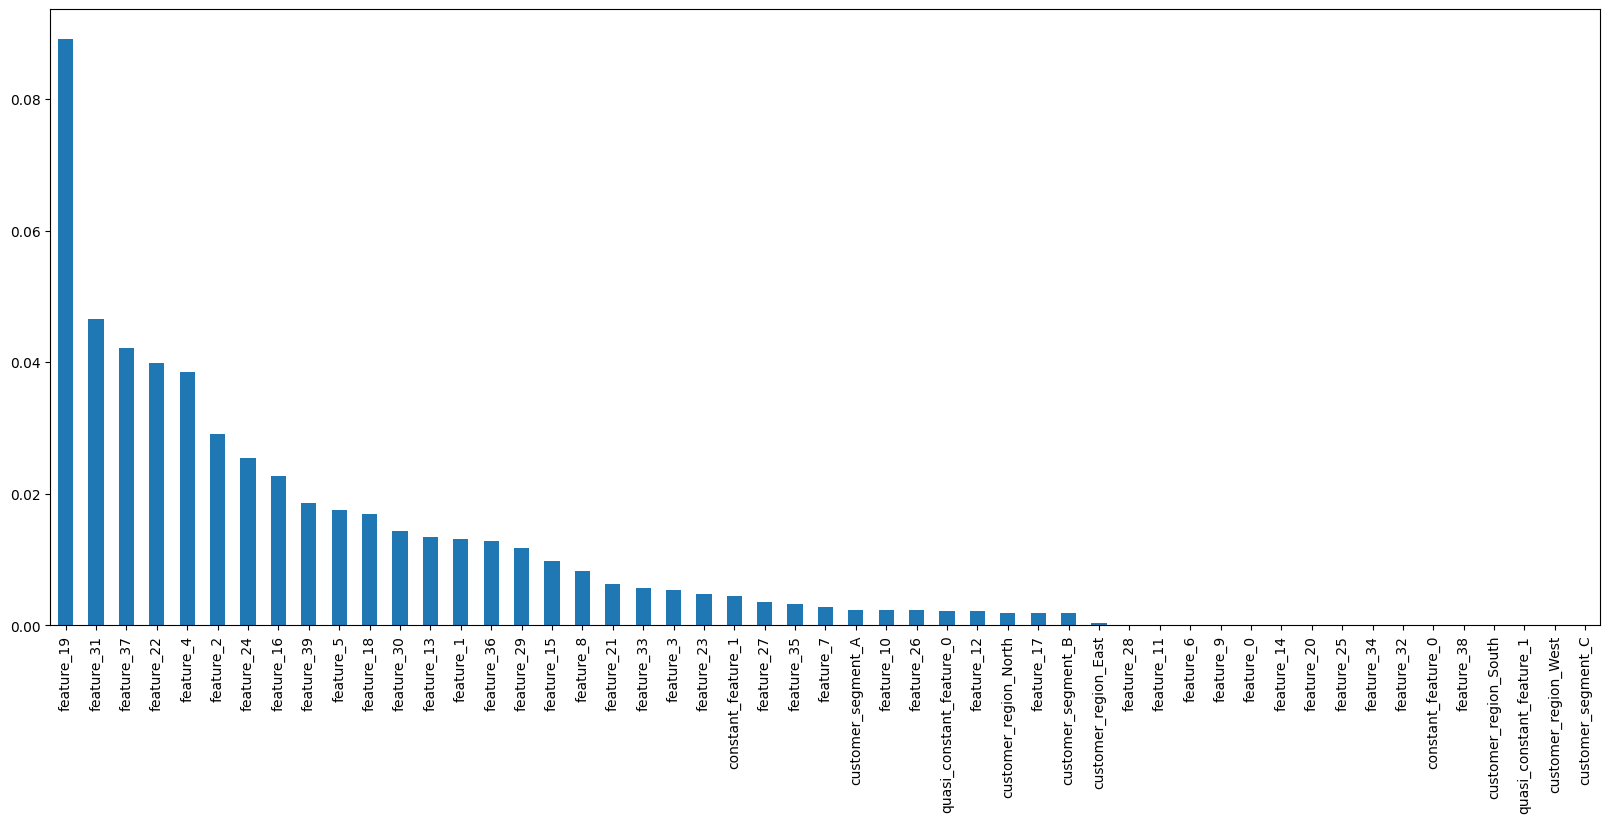

In [42]:
mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))

**Constant , quasi constant and mutual information feature extraction for customer financial fraud dataset**

In [43]:
df_fraud = pd.read_csv("financial_fraud_dataset.csv")

In [45]:
x_train,x_test,y_train,y_test=train_test_split(df_fraud.drop('is_fraud',axis=1),df_fraud['is_fraud'],test_size=0.2,random_state=42)

In [46]:
constant_features = [feature for feature in x_train.columns if x_train[feature].std() == 0]

In [47]:
print(len(constant_features))

4


In [48]:
x_train.drop(labels=constant_features, axis=1, inplace=True)
x_test.drop(labels=constant_features, axis=1, inplace=True)

x_train.shape, x_test.shape

((12000, 64), (3000, 64))

In [49]:
df_fraud = pd.read_csv("financial_fraud_dataset.csv")

In [50]:
x_train,x_test,y_train,y_test=train_test_split(df_fraud.drop('is_fraud',axis=1),df_fraud['is_fraud'],test_size=0.2,random_state=42)

In [51]:
quasi_const_feat = []
for feature in x_train.columns:
    predominant = (x_train[feature].value_counts() / float(len(x_train))).sort_values(ascending=False).values[0]
    if predominant >= 0.999:
        quasi_const_feat.append(feature)

print(len(quasi_const_feat))

4


In [52]:
x_train.drop(labels=quasi_const_feat, axis=1, inplace=True)
x_test.drop(labels=quasi_const_feat, axis=1, inplace=True)

x_train.shape, x_test.shape

((12000, 64), (3000, 64))

In [53]:
df_fraud = pd.read_csv("financial_fraud_dataset.csv")

In [54]:
x_train,x_test,y_train,y_test=train_test_split(df_fraud.drop('is_fraud',axis=1),df_fraud['is_fraud'],test_size=0.2,random_state=42)

In [55]:
mi = pd.Series(mutual_info_classif(x_train, y_train), index=x_train.columns)
mi = mi.sort_values(ascending=False)

<Axes: >

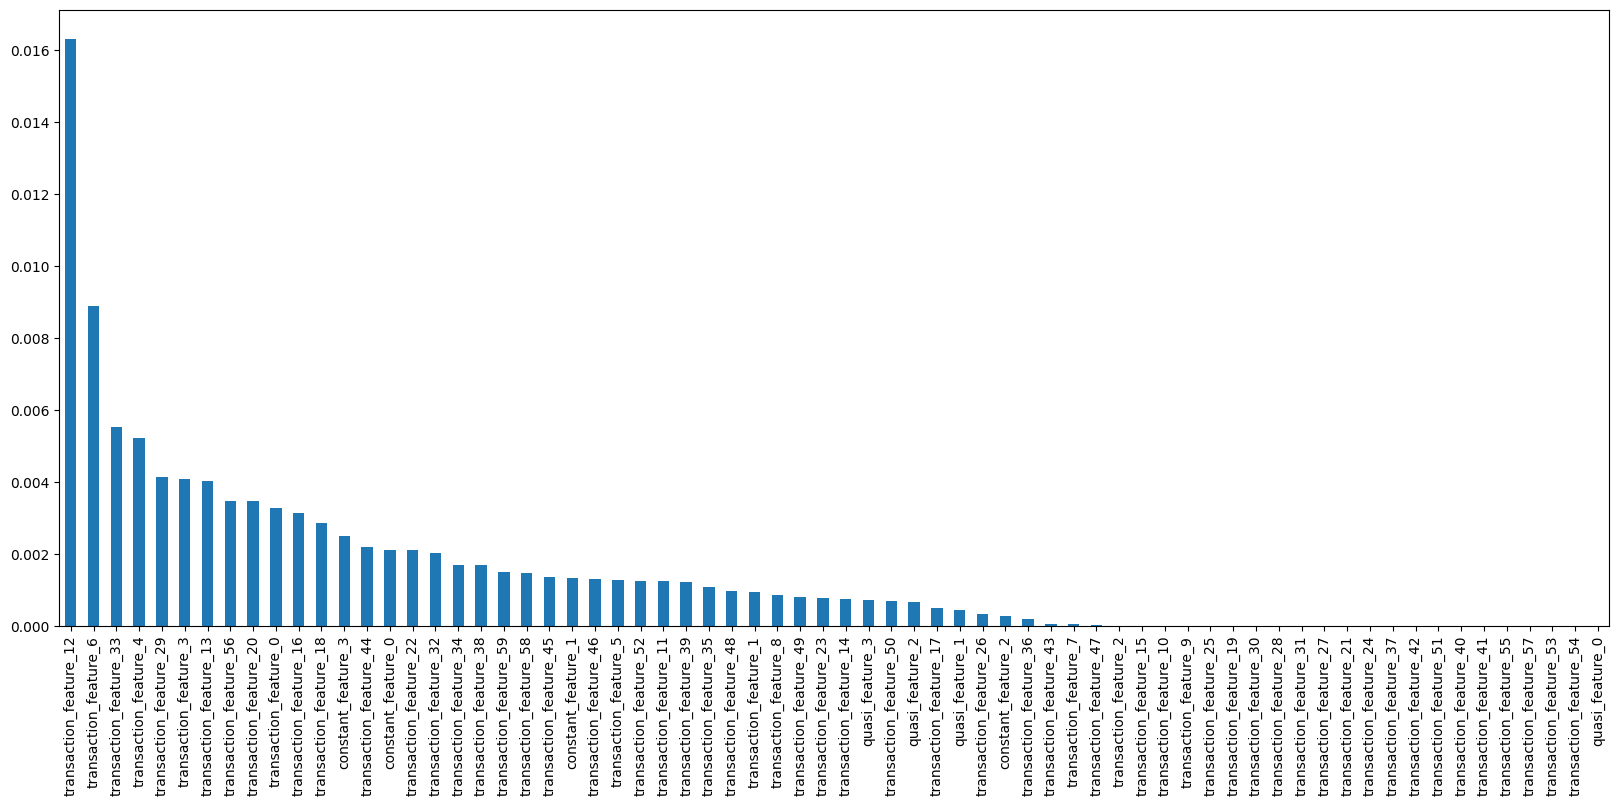

In [56]:
mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))

**Constant , quasi constant and mutual information feature extraction for sensor maintanence dataset**

In [57]:
df_sensor = pd.read_csv("sensor_maintenance_dataset.csv")

In [59]:
df_sensor.head()

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_47,sensor_48,sensor_49,constant_sensor_0,constant_sensor_1,constant_sensor_2,quasi_sensor_0,quasi_sensor_1,quasi_sensor_2,machine_failure
0,-5.410185,5.378142,-3.884643,-2.169631,4.123428,-0.504097,0.738248,-4.893472,0.404372,-1.056840,...,-4.652365,-1.274815,-1.700723,100.0,100.0,100.0,0.0,0.0,0.0,0
1,-0.382658,-4.719085,5.953480,-3.097678,-2.270553,0.195060,-2.159634,-2.821790,0.763820,8.886841,...,0.356394,-0.166773,-1.599835,100.0,100.0,100.0,0.0,0.0,0.0,0
2,2.177276,7.892685,-5.078570,-14.355738,3.798182,-1.305037,0.303657,-0.526450,-0.603719,-12.373883,...,-9.673842,-3.098930,-0.356884,100.0,100.0,100.0,0.0,0.0,0.0,0
3,-8.867607,1.713524,3.810353,-2.299291,1.617832,3.178248,0.247527,-5.284304,0.380522,4.547676,...,-0.635768,-2.072230,-1.395087,100.0,100.0,100.0,0.0,0.0,0.0,0
4,-4.141530,0.236552,4.334040,2.994789,-1.146720,2.759954,0.320348,-0.974736,0.264173,4.672749,...,-0.211769,-0.443441,0.000516,100.0,100.0,100.0,0.0,0.0,0.0,0


In [60]:
x_train,x_test,y_train,y_test=train_test_split(df_sensor.drop('machine_failure',axis=1),df_sensor['machine_failure'],test_size=0.2,random_state=42)

In [61]:
constant_features = [feature for feature in x_train.columns if x_train[feature].std() == 0]

In [62]:
print(len(constant_features))

3


In [63]:
x_train.drop(labels=constant_features, axis=1, inplace=True)
x_test.drop(labels=constant_features, axis=1, inplace=True)

x_train.shape, x_test.shape

((9600, 53), (2400, 53))

In [64]:
df_sensor = pd.read_csv("sensor_maintenance_dataset.csv")

In [65]:
x_train,x_test,y_train,y_test=train_test_split(df_sensor.drop('machine_failure',axis=1),df_sensor['machine_failure'],test_size=0.2,random_state=42)

In [66]:
quasi_const_feat = []
for feature in x_train.columns:
    predominant = (x_train[feature].value_counts() / float(len(x_train))).sort_values(ascending=False).values[0]
    if predominant >= 0.999:
        quasi_const_feat.append(feature)

print(len(quasi_const_feat))

3


In [67]:
x_train.drop(labels=quasi_const_feat, axis=1, inplace=True)
x_test.drop(labels=quasi_const_feat, axis=1, inplace=True)

x_train.shape, x_test.shape

((9600, 53), (2400, 53))

In [68]:
df_sensor = pd.read_csv("sensor_maintenance_dataset.csv")

In [69]:
x_train,x_test,y_train,y_test=train_test_split(df_sensor.drop('machine_failure',axis=1),df_sensor['machine_failure'],test_size=0.2,random_state=42)

In [70]:
mi = pd.Series(mutual_info_classif(x_train, y_train), index=x_train.columns)
mi = mi.sort_values(ascending=False)

<Axes: >

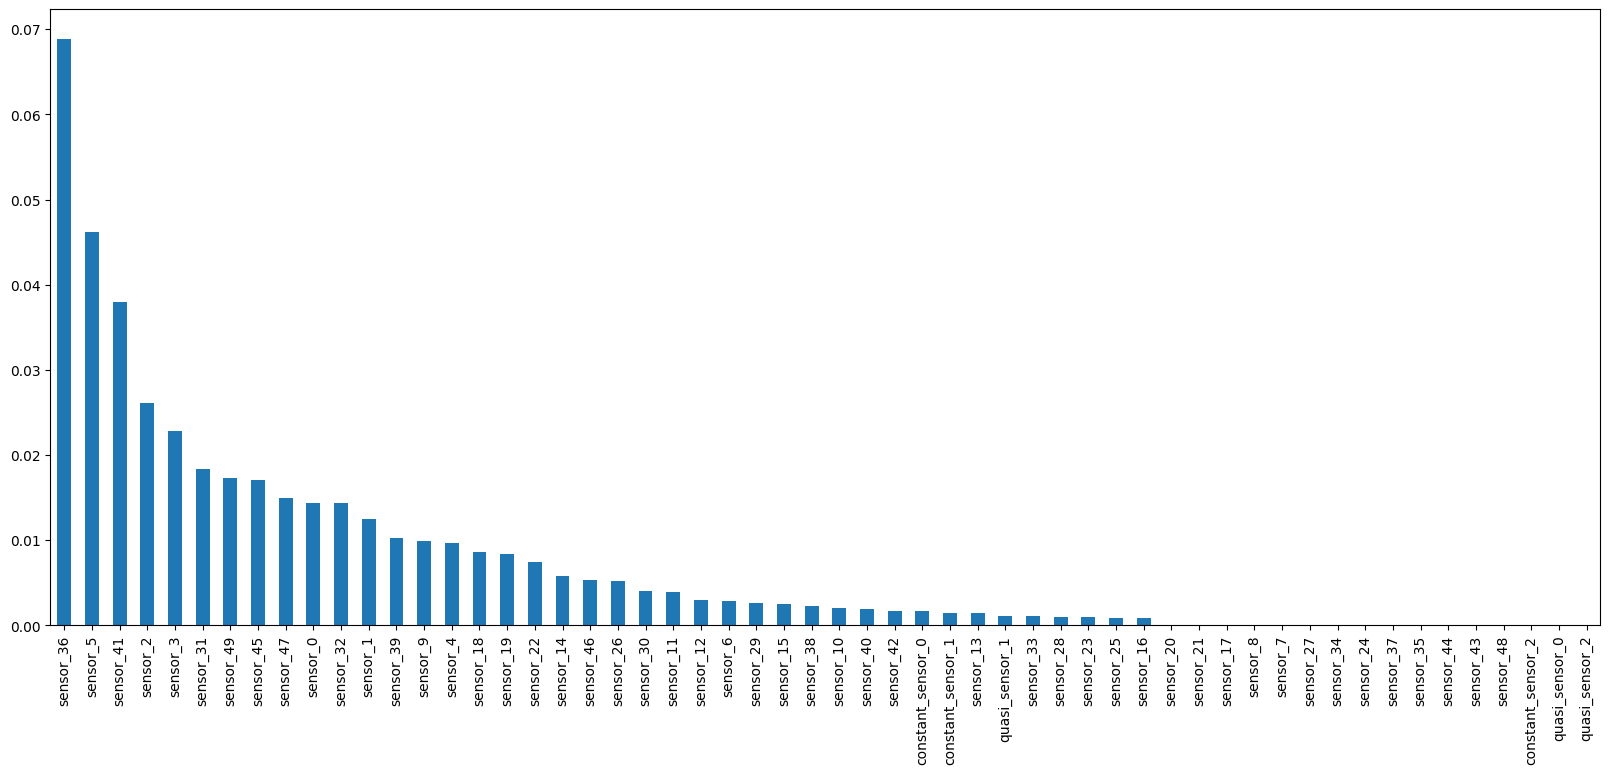

In [72]:
mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))